<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Scaler%20-%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

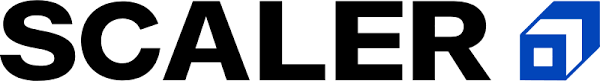

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit

# **Business Problem**

* Working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database.
* You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics


# **Desired Outcome of Analysis**


* Define Problem Statement and perform Exploratory Data Analysis
* Definition of problem (as per given problem statement with additional views)
* Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
* Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
* Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
* Illustrate the insights based on EDA
* Comments on range of attributes, outliers of various attributes
* Comments on the distribution of the variables and relationship between them
* Comments for each univariate and bivariate plots
* Data Pre-processing:
** Mean/ KNN Imputation
** Regex for cleaning company names
** Standardization & Encoding
* Manual Clustering:
** Creating Designation Flag & Insights
** Creating Class Flag & Insights
** Creating Tier Flag & Insights
* Unsupervised learning:
** Checking clustering tendency, Elbow method & K- means clustering
** Hierarchical Clustering
* Actionable Insights & Recommendations

# **Loading Modules and Data**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")

## Data Dictionary

1. Unnamed 0: The index of the dataset.
2. Email_hash: An anonymized identifier representing the email of the learner.
3. Company_hash: An anonymized identifier indicating the current employer of the
learner.
4. orgyear: Represents the year the learner began employment at the current
company.
5. CTC: Current Compensation to the Company (CTC) of the learner.
6. Job_position: Represents the job profile or role of the learner within their
company.
7. CTC_updated_year: The year in which the learner's CTC was most recently
updated. This could be due to yearly increments, promotions, or other factors.

In [ ]:
data.shape

(205843, 7)

In [ ]:
data.head(10)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
5,5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0
6,6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0
7,7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0
8,8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,NaN,2019.0
9,9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,NaN,2019.0


In [ ]:
data.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


* There are 205843 Records of Data
* email_hash refers to each individual Learner--> 153443 Individual Details
* company_hash refers to Each Individual Compnay --> there are 37299 Companies
* 1017 Different job_position avaiable

In [ ]:
data[data.email_hash == data.email_hash[11]]

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
11,11,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016.0,600000,iOS Engineer,2021.0
19283,19295,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016.0,600000,NaN,2021.0
144109,144648,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016.0,330000,iOS Engineer,2019.0


* Same learner has multiple rows...we will merge all the Rows after extracting information frmom individual rows

# **Data Overview & Cleaning**

## Dropping Irrelevant columns

In [ ]:
data.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

* "Unnamed" 0"  Feature is just an index , so No value as a
feature
* Similarily "email_hash" is just a unique Identifier of employee...not needed for clustering
* So we will drop these 2 feature

In [ ]:
data.drop(["Unnamed: 0","email_hash"], axis = 1, inplace = True)

In [ ]:
data.shape

(205843, 5)

## Duplicate Values & Their Treatment

In [ ]:
data.loc[data.duplicated()]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
584,fxuqg rxbxnta,2019.0,350000,NaN,2020.0
796,nvnv wgzohrnvzwj otqcxwto,2019.0,340000,NaN,2020.0
882,wgszxkvzn,2020.0,350000,NaN,2020.0
899,nvnv wgzohrnvzwj otqcxwto,2020.0,700000,NaN,2020.0
1040,nvnv wgzohrnvzwj otqcxwto,2020.0,340000,NaN,2020.0
...,...,...,...,...,...
205800,zgn vuurxwvmrt,2021.0,350000,NaN,2021.0
205822,zggz uqgahwno,2013.0,2300000,NaN,2020.0
205829,yomw,2019.0,700000,NaN,2019.0
205830,zgn vuurxwvmrt,2019.0,700000,NaN,2019.0


* Duplicate rows are present, lets drop them

In [ ]:
print(data.shape)
print(data.drop_duplicates().shape)
data.drop_duplicates(inplace=True)

(205843, 5)
(188372, 5)


## Data Cleaning

In [ ]:
import re
def remove_special (string):
    new_string=re.sub('[^A-Za-z ]+','', string)
    return new_string

In [ ]:
#what happens here
mystring='\tAirtel\\\\&&**()90 X Labs'
re.sub('[^A-Za-z0-9 ]+', '', mystring)

'Airtel90 X Labs'

In [ ]:
data.job_position=data.job_position.apply(lambda x: remove_special(str(x)))
data.job_position=data.job_position.apply(lambda x: x.lower())
data.job_position=data.job_position.apply(lambda x: x.strip())
data.job_position

0                      other
1         fullstack engineer
2           backend engineer
3           backend engineer
4         fullstack engineer
                 ...        
205838                   nan
205839                   nan
205840                   nan
205841                   nan
205842                   nan
Name: job_position, Length: 188372, dtype: object

In [ ]:
data['company_hash'].value_counts().sort_index()

company_hash
0                                 2
0000                              1
01 ojztqsj                        2
05mz exzytvrny uqxcvnt rxbxnta    2
1                                 2
                                 ..
zyvzwt wgzohrnxzs tzsxzttqo       1
zz                                2
zzb ztdnstz vacxogqj ucn rna      2
zzgato                            1
zzzbzb                            1
Name: count, Length: 37299, dtype: int64

In [ ]:
data.company_hash=data.company_hash.apply(lambda x: remove_special(str(x)))
data.company_hash=data.company_hash.apply(lambda x: x.lower())
data.company_hash=data.company_hash.apply(lambda x: x.strip())
data.company_hash

0                    atrgxnnt xzaxv
1         qtrxvzwt xzegwgbb rxbxnta
2                     ojzwnvwnxw vx
3                         ngpgutaxv
4                        qxen sqghu
                    ...            
205838                    vuurt xzw
205839                    husqvawgb
205840                     vwwgrxnt
205841               zgn vuurxwvmrt
205842               bgqsvz onvzrtj
Name: company_hash, Length: 188372, dtype: object

In [ ]:
print(data.shape)
print(data.drop_duplicates().shape)
data.drop_duplicates(inplace=True)

(188372, 5)
(188245, 5)


## Missingvalues & Their Treatment

In [ ]:
#removing rows where company or job_position is not available
data=data[ ~((data['company_hash']=='') | (data['job_position']==''))]

In [ ]:
data.isna().sum(axis = 0)

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

* we can impute missing values through KNN Imputation for "orgyear" but many columns are of Object type
* So for the Sake of Problem we will use Median imputation

In [ ]:
data.loc[data.orgyear.isna()]["company_hash"].value_counts()

company_hash
vbuygqv ogenfvqt uqxcvnt rxbxnta    2
vwwtznhqt                           2
nvnv wgzohrnvzwj otqcxwto           2
husqvawgb                           2
qvkgquvj                            1
                                   ..
nojo                                1
xuvj ojontbo rna                    1
srgmvr                              1
x wgzohrnxzs                        1
vhngsqxa                            1
Name: count, Length: 82, dtype: int64

In [ ]:
data[data["company_hash"]=="vwwtznhqt"]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
460,vwwtznhqt,2016.0,1010000,fullstack engineer,2020.0
477,vwwtznhqt,2012.0,350000,backend engineer,2020.0
568,vwwtznhqt,2018.0,460000,backend engineer,2020.0
582,vwwtznhqt,2017.0,570000,other,2020.0
637,vwwtznhqt,2012.0,78000000,frontend engineer,2020.0
...,...,...,...,...,...
204831,vwwtznhqt,2009.0,820000,nan,2018.0
204974,vwwtznhqt,2011.0,900000,data analyst,2021.0
205149,vwwtznhqt,2018.0,1010000,backend engineer,2021.0
205261,vwwtznhqt,2020.0,390000,frontend engineer,2021.0


In [ ]:
company_median_org_year=data.groupby('company_hash')['orgyear'].median()

In [ ]:
#Code to impute
#-----------------------------------------------------------------------
import numpy as np
def null_imputation(table_from_which_we_need_to_fill, main_col, null_col):
    if np.isnan(null_col):
        return table_from_which_we_need_to_fill[main_col]
    else:
        return null_col
#-----------------------------------------------------------------------


data['orgyear']=data.apply(lambda x: null_imputation(company_median_org_year,x['company_hash'],x['orgyear'] ), axis=1)

In [ ]:
len(data[data['orgyear'].isnull()])

26

* Lets Drop the Remaining Rows

In [ ]:
#dropping remaining null values
data=data[~data['orgyear'].isnull()]

* Filling Missing values in "job_position" & "company_hash" as "Others"

In [ ]:
data['job_position'] = data['job_position'].fillna('Others')
data['company_hash'] = data['company_hash'].fillna('Others')

## Checking Outliers

In [ ]:
#simple understanding
data.orgyear.describe()

count    188126.000000
mean       2014.613995
std          66.472920
min           0.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max       20165.000000
Name: orgyear, dtype: float64

<Axes: ylabel='orgyear'>

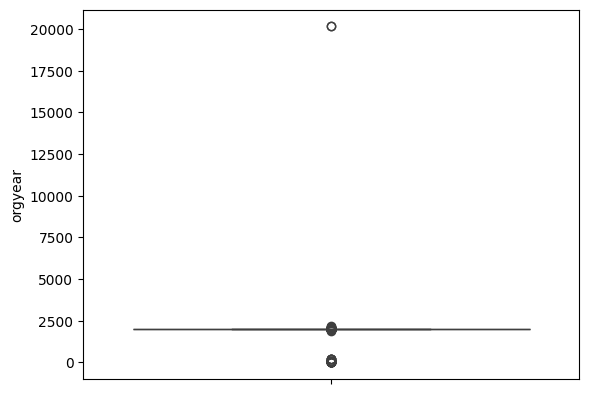

In [ ]:
sns.boxplot(y = data["orgyear"])

In [ ]:
#removing outliers from orgyear using IQR

q1=data.orgyear.quantile(0.25)
q3=data.orgyear.quantile(0.75)
iqr=q3-q1

data=data.loc[(data.orgyear>=q1-1.5*iqr) & (data.orgyear<=q3+1.5*iqr)]


<Axes: ylabel='orgyear'>

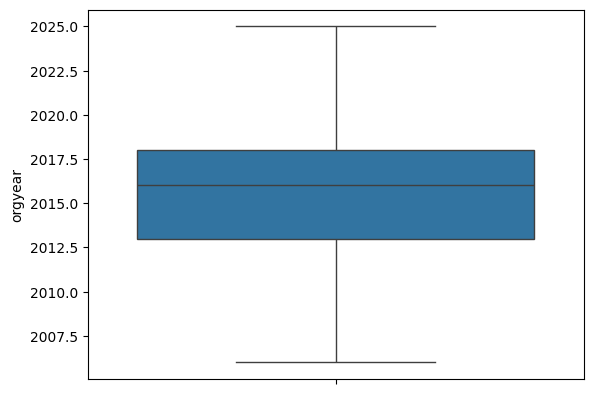

In [ ]:
sns.boxplot(y = data["orgyear"])

In [ ]:
data.orgyear.describe()

count    180406.000000
mean       2015.421513
std           3.333918
min        2006.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2025.000000
Name: orgyear, dtype: float64

In [ ]:
data.ctc.describe()

count    1.804060e+05
mean     2.323162e+06
std      1.221796e+07
min      2.000000e+00
25%      5.800000e+05
50%      1.000000e+06
75%      1.680000e+06
max      1.000150e+09
Name: ctc, dtype: float64

<Axes: ylabel='ctc'>

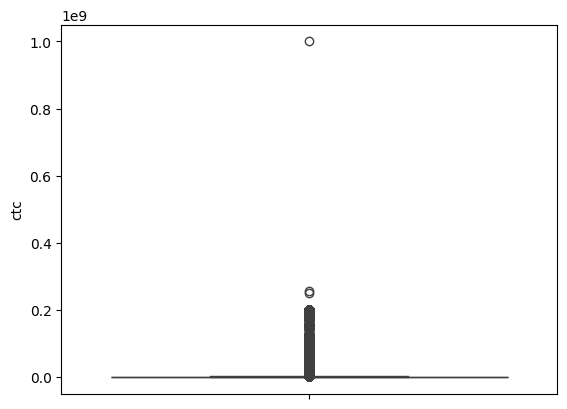

In [ ]:
sns.boxplot(y = data["ctc"])

In [ ]:
#removing outliers from ctc using IQR

q1=data.ctc.quantile(0.25)
q3=data.ctc.quantile(0.75)
iqr=q3-q1

data=data.loc[(data.ctc>=q1-1.5*iqr) & (data.ctc<=q3+1.5*iqr)]

<Axes: ylabel='ctc'>

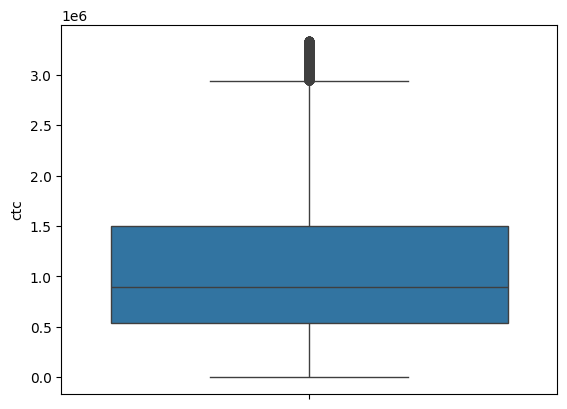

In [ ]:
sns.boxplot(y = data["ctc"])

In [ ]:
data.ctc.describe()

count    1.689860e+05
mean     1.086971e+06
std      7.268886e+05
min      2.000000e+00
25%      5.400000e+05
50%      9.000000e+05
75%      1.500000e+06
max      3.330000e+06
Name: ctc, dtype: float64

## Masking companies by renaming it to "Others" having count less than 5

In [ ]:
data.company_hash.value_counts()

company_hash
nvnv wgzohrnvzwj otqcxwto    4111
xzegojo                      2910
vbvkgz                       2227
wgszxkvzn                    2115
vwwtznhqt                    1998
                             ... 
mvqw xzaxv                      1
wgznghq                         1
uqgbvwn xzegntwy ucn rna        1
bvctqxwpo ftm otqcxwto          1
wyvqntq wgbbhzxwvnxgzo          1
Name: count, Length: 34008, dtype: int64

In [ ]:
data=data.apply(lambda x: x.mask(x.map(x.value_counts())<=5,'Others') if x.name =='company_hash' else x)

In [ ]:
data.company_hash.value_counts(ascending = True)

company_hash
ohbngnvr ojontbo                 6
trrxt bvt                        6
mgzatcvrht                       6
vznfgqpo                         6
btvohqtgzt                       6
                             ...  
wgszxkvzn                     2115
vbvkgz                        2227
xzegojo                       2910
nvnv wgzohrnvzwj otqcxwto     4111
Others                       46749
Name: count, Length: 2943, dtype: int64

In [ ]:
data.job_position.value_counts(ascending = True)

job_position
sps associate                       1
abap developer                      1
lead consultant technology          1
info technology sr associate        1
associate technical support         1
                                ...  
frontend engineer                9428
other                           14750
fullstack engineer              22376
backend engineer                36439
nan                             39859
Name: count, Length: 762, dtype: int64

In [ ]:
data=data.apply(lambda x: x.mask(x.map(x.value_counts())<=5,'Others') if x.name =='job_position' else x)

In [ ]:
data.job_position.value_counts(ascending = True)

job_position
android application developer                6
full stack engineer                          6
application development analyst              6
analyst programmer                           6
senior software  development engineer        6
                                         ...  
frontend engineer                         9428
other                                    14750
fullstack engineer                       22376
backend engineer                         36439
nan                                      39859
Name: count, Length: 72, dtype: int64

## Feature Engineering

* Let us create some flag for Quaterly Rating, Monthly Income , Grade by checking if Rating has increased or decreased --> if Increase we will categorize it as "1" representing growth
* Next we will create our Target Variable for each driver ID from last working day--> if it present value will be "1" meaning driver left

### Years of Experience

In [ ]:
data["orgyear"].max()

2025.0

In [ ]:
data['orgyear'] = data.apply(lambda x: x['orgyear'] if x['orgyear'] <=
                     2024 else 2024, axis=1)

In [ ]:
data['years_of_experience']=2024-data['orgyear']

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(147062, 6)

In [ ]:
data=data[~data['years_of_experience'].isnull()]

In [ ]:
#ctc_updated_year_check
data['ctc_updated_year'] = data.apply(lambda x: x['orgyear'] if x['ctc_updated_year'] <
                     x['orgyear'] else x['ctc_updated_year'], axis=1)

In [ ]:
data.isnull().sum()

company_hash           0
orgyear                0
ctc                    0
job_position           0
ctc_updated_year       0
years_of_experience    0
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(146027, 6)

## Final Cleaned Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146027 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         146027 non-null  object 
 1   orgyear              146027 non-null  float64
 2   ctc                  146027 non-null  int64  
 3   job_position         146027 non-null  object 
 4   ctc_updated_year     146027 non-null  float64
 5   years_of_experience  146027 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 7.8+ MB


In [ ]:
data.describe(include = "all")

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
count,146027,146027.000000,1.460270e+05,146027,146027.000000,146027.000000
unique,2943,NaN,NaN,72,NaN,NaN
top,Others,NaN,NaN,nan,NaN,NaN
freq,24473,NaN,NaN,32793,NaN,NaN
mean,NaN,2015.453166,1.129425e+06,NaN,2019.600711,8.546834
std,NaN,3.306079,7.439734e+05,NaN,1.343856,3.306079
min,NaN,2006.000000,2.000000e+00,NaN,2015.000000,0.000000
25%,NaN,2013.000000,5.700000e+05,NaN,2019.000000,6.000000
50%,NaN,2016.000000,9.600000e+05,NaN,2020.000000,8.000000
75%,NaN,2018.000000,1.560000e+06,NaN,2021.000000,11.000000


# **Model Training - Random Forest[Ensemble - Bagging]**

## **Hyperparameter Tuning for RF**

In [ ]:
params = {
    'n_estimators' : [100,300,500],
    'max_depth' : [3,5,10],
    'max_features' : [3,5,8],
    'bootstrap' : [True,False]
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=7),
                            param_distributions = params,
                            scoring = 'recall',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

In [ ]:
# 1st Random search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 100, 'max_features': 5, 'max_depth': 3, 'bootstrap': False}
Best score:  0.8802874176705954


In [ ]:
# 2nd Random search
random.fit(Xtrainsm, ytrainsm)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=7),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10],
                                        'max_features': [3, 5, 8],
                                        'n_estimators': [100, 300, 500]},
                   scoring='recall')

In [ ]:
print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 500, 'max_features': 3, 'max_depth': 5, 'bootstrap': False}
Best score:  0.8825948195107074


In [ ]:
# 3rd Random Search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 300, 'max_features': 5, 'max_depth': 3, 'bootstrap': False}
Best score:  0.8826184200015975


In [ ]:
params1 = {
    'n_estimators' : [100,300,500],
    'max_depth' : [3,5,6],
    'max_features' : [3,5,6],
    'bootstrap' : [False]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = RandomForestClassifier(random_state=7),
                    param_grid = params1,
                    scoring = 'recall',
                    cv = 3,
                    n_jobs=-1,
                    )

In [ ]:
grid.fit(Xtrainsm, ytrainsm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=7), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [3, 5, 6],
                         'max_features': [3, 5, 6],
                         'n_estimators': [100, 300, 500]},
             scoring='recall')

In [ ]:
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': False, 'max_depth': 3, 'max_features': 5, 'n_estimators': 300}
Best score:  0.8826184200015975


* From Random and Grid Search we were able to fix out Hyper parameters
** max_depth = 3
** max_features = 5
** n_estimators = 300
** bootstrap = False

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7,max_features = 5,max_depth=3, n_estimators=300, bootstrap=false,criterion='gini')

In [ ]:
rf_clf.fit(Xtrainsm,ytrainsm)

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=7)

## Accuracy

In [ ]:
rf_clf.score(Xtrainsm,ytrainsm)

0.8114307931570762

In [ ]:
ypred = rf_clf.predict(Xtest)

In [ ]:
rf_clf.score(Xtest,ytest)

0.7945492662473794

* 79% Predictions by our model are accurate

## Precision

In [ ]:
precision_score(ytest, ypred)

0.8411764705882353

* 84% of all Positive prediction are actually positve

## Recall

In [ ]:
recall_score(ytest, ypred)

0.8666666666666667

* Our Model predicts only 87% of all actual Positives as postives rest 13% of actual Positives aredetected as Negative[False Negatives]

## F1 Score

In [ ]:
f1_score(ytest,ypred)

0.853731343283582

* From F1_score of 0.85, we can say Our model has almost good balance between reducing False Positives[Detect as Churner but not] and False Negative[Actually Churner but detect as not Churner]
* However there is need to Further improve F1_Score

## Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(ytest, ypred)
conf_matrix

array([[ 93,  54],
       [ 44, 286]])

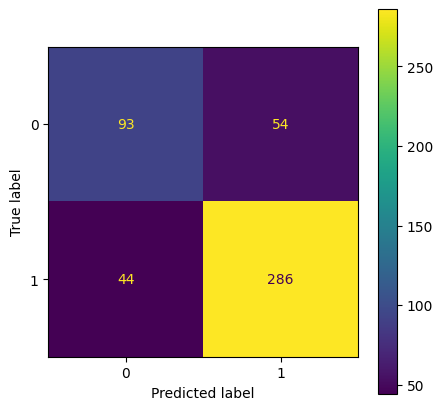

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* As Seen Earlier from High Recall and  Better Precision values, same is reflected in Confusion Matrix
* How ever our model is detecting FP & FN at almost same
* **But as per the business problem our Focus is to identify all attrition driver as acquiring new drivers is more expensive than retaining existing ones --> So we want to reduce False Negtives**

* So we will focus on Improving Recall at moderate expense of Precision by changing the threshold value for Classification


## ROC

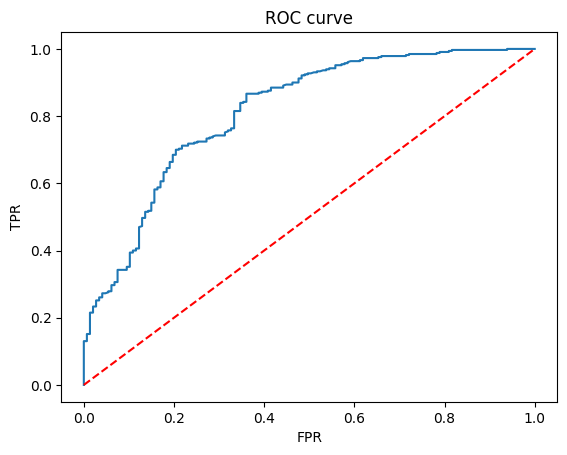

In [ ]:
probability = rf_clf.predict_proba(Xtest)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(ytest,probabilites)

plt.plot(fpr,tpr)

#random model for reference
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(ytest,probabilites)

0.8134611420325706

roc_auc_score is 0.81 meaning our model can 81% efficiently Distinguish Positve and Neagative Classes

## Precision Recall Curve

In [ ]:
precision, recall, thr = precision_recall_curve(ytest, probabilites)

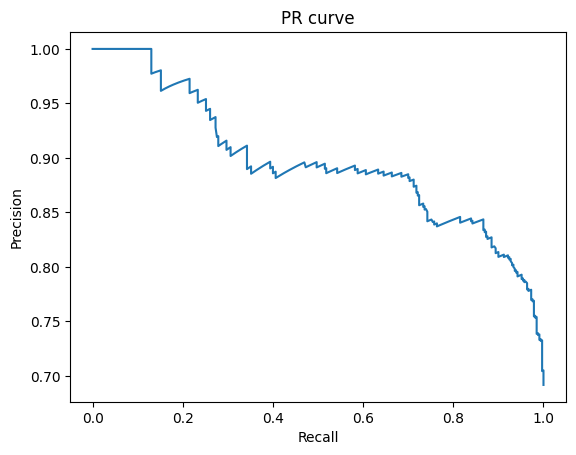

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.8957804551237599

* 0.895 AUC under PR curve represents that our model has high Presicion and Recall values

## Classification Report

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65       147
         1.0       0.84      0.87      0.85       330

    accuracy                           0.79       477
   macro avg       0.76      0.75      0.75       477
weighted avg       0.79      0.79      0.79       477



* our Random Forest Model can detect attrition driver with
** 84% Precision
** 87% Recall
** 79% Accuracy
** 85% F1-Score

## Changing Classification Threshold for Better Recall

* As per the bussiness problem, acquiring new drivers is more expensive than retaining existing ones
* So our focus should to predict TP and Reduce FN, so that we can correctly idenitfy prospective Attrition Drivers

* Now let us plot Recall and Precision Variation w.r.t Different Classification Threshold values
* So that we can select best threshold for our Bussiness Problem

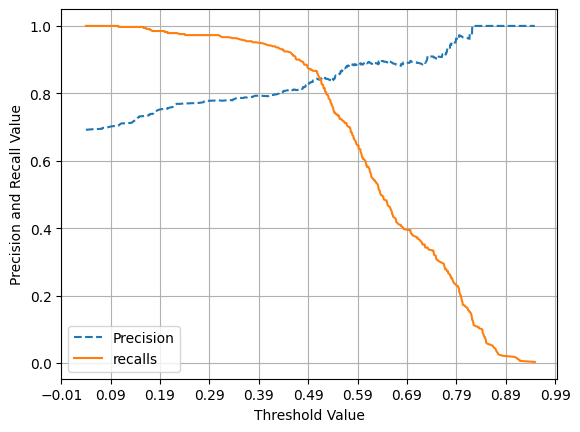

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  threshold_boundary = thresholds.shape[0]
  # plot precision
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',
           label="Precision")
  # plot recall
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(ytest, probabilites)

* So in order to increase Recall of our Model, we can reduce the Threshold from Default 0.5 --> 0.43 to get better Recall result at little degrading precision result[which is ok as per company assement]
* No we will check the Model perfromance on test data with New threshold

In [ ]:
ypredthres_043 = (rf_clf.predict_proba(Xtest)[:, 1] >= 0.43).astype(int)

In [ ]:
recall_score(ytest, ypredthres_043)

0.9333333333333333

In [ ]:
precision_score(ytest, ypredthres_043)

0.8

In [ ]:
f1_score(ytest,ypredthres_043)

0.8615384615384616

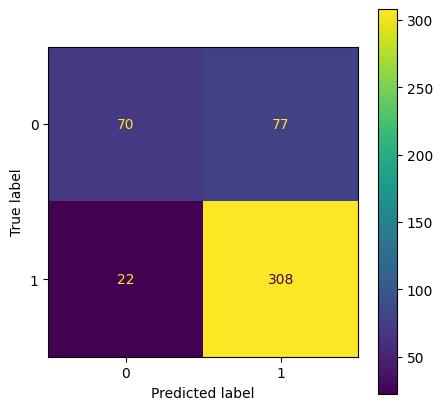

In [ ]:
conf_matrix = confusion_matrix(ytest, ypredthres_043)
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* After Threshold Change from 0.5 --> 0.43 ,our Random Forest Model can detect attrition driver with
** Precision: 84% --> 80%
** **Recall : 87% --> 93%**
** Accuracy: No change 79%
** F1-Score : 85% --> 86%
** No of False Neagtive Reduced from 42 --> 22 [Nearly 100% Improvment]

# **Model Training - Gradient Boosting DT [Ensemble - Boosting]**

## **Hyperparameter Tuning for GBDT**

In [ ]:
params = {
    'n_estimators' : [100,300,500],
    'max_depth' : [3,5,10],
    'max_features' : [3,5,8],
    'learning_rate' : [0.01,0.05,0.1,0.5]
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier


random = RandomizedSearchCV(estimator = GradientBoostingClassifier(random_state=7),
                            param_distributions = params,
                            scoring = 'recall',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

In [ ]:
# 1st Random search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 300, 'max_features': 8, 'max_depth': 3, 'learning_rate': 0.1}
Best score:  0.8646602618565234


In [ ]:
# 2nd Random search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 100, 'max_features': 3, 'max_depth': 3, 'learning_rate': 0.5}
Best score:  0.8428879012991163


In [ ]:
# 3rd Random Search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 100, 'max_features': 5, 'max_depth': 3, 'learning_rate': 0.01}
Best score:  0.8725101482110827


In [ ]:
params1 = {
    'n_estimators' : [100,200,300],
    'max_depth' : [3],
    'max_features' : [5,6,8],
    'learning_rate' : [0.01,0.025,0.05,0.1]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = GradientBoostingClassifier(random_state=7),
                    param_grid = params1,
                    scoring = 'recall',
                    cv = 3,
                    n_jobs=-1,
                    )

In [ ]:
grid.fit(Xtrainsm, ytrainsm)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=7),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.1],
                         'max_depth': [3], 'max_features': [5, 6, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [ ]:
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 5, 'n_estimators': 100}
Best score:  0.8725101482110827


* From Random and Grid Search we were able to fix out Hyper parameters for GBDT as below
** max_depth = 3
** max_features = 5
** n_estimators = 100
** learning rate = 0.01

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100,max_depth=3,max_features = 5,learning_rate=0.01,random_state=7)
gb_clf.fit(Xtrainsm,ytrainsm)
ypred = gb_clf.predict(Xtest)

## Accuracy

In [ ]:
gb_clf.score(Xtrainsm,ytrainsm)

0.9284603421461898

In [ ]:
ypred = gb_clf.predict(Xtest)

In [ ]:
gb_clf.score(Xtest,ytest)

0.7651991614255765

* 76% Predictions by our model are accurate

## Precision

In [ ]:
precision_score(ytest, ypred)

0.807909604519774

* 80% of all Positive prediction are actually positve

## Recall

In [ ]:
recall_score(ytest, ypred)

0.8666666666666667

* Our Model predicts only 87% of all actual Positives as postives remaining 13% as Negative[Which are False Negatives]

## F1 Score

In [ ]:
f1_score(ytest,ypred)

0.8362573099415205

* From F1_score of 0.83, we can say Our model has almost good balance between reducing False Positives[Detect as attrition driver but not] and False Negative[Actually attrition driver but detect as not attrition]
* However there is need to Further improve F1_Score

## Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(ytest, ypred)
conf_matrix

array([[ 79,  68],
       [ 44, 286]])

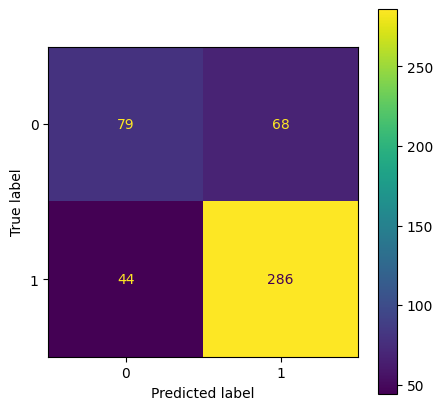

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* As Seen Earlier from High Recall and  Better Precision values, same is reflected in Confusion Matrix
* How ever our model is detecting FP & FN at almost 10% & 6% , But as per the business problem our Focus is to identify all attrition driver as acquiring new drivers is more expensive than retaining existing ones
* So we will focus on Improving Recall at moderate expense of Precision


## ROC

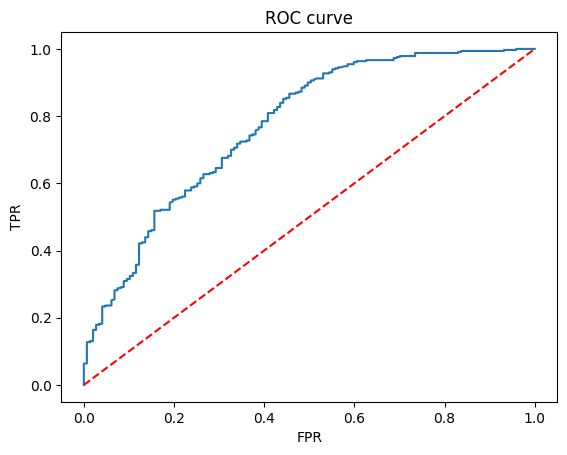

In [ ]:
probability = gb_clf.predict_proba(Xtest)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(ytest,probabilites)

plt.plot(fpr,tpr)

#random model for reference
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(ytest,probabilites)

0.7706761492475778

roc_auc_score is 0.77 meaning our model can 77% efficiently Distinguish Positve and Negative Classes

## Precision Recall Curve

In [ ]:
precision, recall, thr = precision_recall_curve(ytest, probabilites)

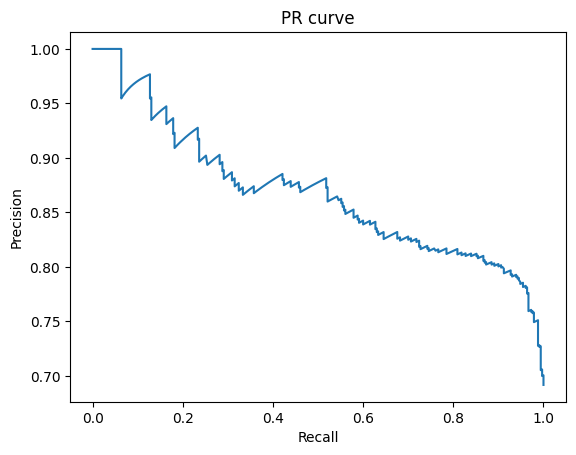

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.8678787549538943

* 0.867 AUC under PR curve represents that our model has high Presicion and Recall values

## Classification Report

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.64      0.54      0.59       147
         1.0       0.81      0.87      0.84       330

    accuracy                           0.77       477
   macro avg       0.73      0.70      0.71       477
weighted avg       0.76      0.77      0.76       477



* our GBDT Model can detect attrition driver with
** 81% Precision
** 87% Recall
** 77% Accuracy
** 84% F1-Score

# **Bussiness Insights**

## Exploratory Data Analysis

* In OLA dataset Shared 68% of the Drivers have attritioned only 32% have retained
* Huge Imbalance in the Data,we have to address imbalnce before model training
* 50% of driver have age range between 29~37
* Min age of Driver is 21 Years
* Max age of Driver is 58 Years
* Attrition almost same in all Age range...compartievely slightly high in 50~60 range
* 59% of Drivers are Male, 41% are Female
* Attrition rate is almost same irrepective of Gender
* Driver with Eduction 12+ are comparitively high
* Attrition rate is almost same w.r.t Education level
* Majority of Driver are having Joning Grade as "1"
* Attrition rate is highest with Driver having Joinin Grade as "1"
* Attrition rate is least with Driver having Joinin Grade as "3"
* Average Total Bussiness values borught by the Driver range from -197,932 ~ 3,972,128
* 25% of Driver have Negative Average value to Compnay
* 50% of Driver have Average Values to Company < 429,498
* Most no of Drivers are from city "C20"
* Least no of Driver from "C11"
* Driver Attrition rate is highest in the City "C13"
* only 2 % of Driver had their Income Growth
* Very low 6.9% Attrition rate observed with Driver of Increase Income
* 68.9% Attrtition rate observed in Driver with No Income Growth
* Only 15 % of Driver had their Quaterly Rating Increase
* 23% Attrition rate observed with Drivers whose Quaterly Rating has Increased
* whereas 77% Attrtition rate observed with Driver whose Quaterly Rating has not Increased
* only 2 % of Driver had their Grade Growth
* Very low 6.9% Attrition rate observed with Driver of Increase in Grade
* 68.9% Attrtition rate observed in Driver with No Grade Growth
* Newly Created Features- Income and Grade are Perfectly Correlated [1]

## Model & Its paramater Inference

### Random Forest [Bagging]

*  From Hyperparameter tuning through Random and Grid Search we were able to fix out Hyper parameters
** max_depth = 3
** max_features = 5
** n_estimators = 300
** bootstrap = False

* 79% Predictions by our model are accurate
* 84% of all Positive prediction are actually positve
* Our Model predicts only 87% of all actual Positives as postives rest 13% of actual Positives aredetected as Negative[False Negatives]
* From F1_score of 0.85, we can say Our model has almost good balance between reducing False Positives[Detect as Churner but not] and False Negative[Actually Churner but detect as not Churner]
* However there is need to Further improve F1_Score
* How ever our model is detecting FP & FN at almost same
* roc_auc_score is 0.81 meaning our model can 81% efficiently Distinguish Positve and Neagative Classes
* 0.895 AUC under PR curve represents that our model has high Presicion and Recall values

* As per the bussiness problem, acquiring new drivers is more expensive than retaining existing ones
* So our focus should to predict TP and Reduce FN, so that we can correctly idenitfy prospective Attrition Drivers
* so, From Classification Threshold Versus Presicion& Recall Curve, we Checked and changed Classification threshold from 0.5 --> 0.39 for Better Results
* After Threshold Change from 0.5 --> 0.43 ,our Random Forest Model can detect attrition driver with
** Precision: 84% --> 80%
** **Recall : 87% --> 93%**
** Accuracy: No change 79%
** F1-Score : 85% --> 86%
** No of False Neagtive Reduced from 42 --> 22 [Nearly 100% Improvment]



### Gradient Boosting Decision Tree[Boosting]

* From Hyperparameter tuning through Random and Grid Search we were able to fix out Hyper parameters for GBDT as below
** max_depth = 3
** max_features = 5
** n_estimators = 100
** learning rate = 0.01

* 76% Predictions by our model are accurate
* 80% of all Positive prediction are actually positve
* Our Model predicts only 87% of all actual Positives as postives remaining 13% as Negative[Which are False Negatives]
* From F1_score of 0.83, we can say Our model has almost good balance between reducing False Positives[Detect as attrition driver but not] and False Negative[Actually attrition driver but detect as not attrition]
* However there is need to Further improve F1_Score
* As Seen Earlier from High Recall and Better Precision values, same is reflected in Confusion Matrix
* roc_auc_score is 0.77 meaning our model can 77% efficiently Distinguish Positve and Negative Classe
* 0.867 AUC under PR curve represents that our model has high Presicion and Recall value
* How ever our model is detecting FP & FN at almost 10% & 6% , But as per the business problem our Focus is to identify all attrition driver as acquiring new drivers is more expensive than retaining existing one
* so, From Classification Threshold Versus Presicion& Recall Curve, we Checked and changed Classification threshold from 0.5 --> 0.39 for Better Results
* After Threshold Change from 0.5 --> 0.37 ,our GBDT Model can detect attrition driver with
** Precision: 81% --> 78%
** Recall : 87% --> 95%
** Accuracy: No change 77%
** F1-Score : 84% --> 86%
** False Negative Reduced from 44 --> 15 [approx 150% Improvment]



# **Recommendations**

* More Information could be inputed into Model for better prediction like below
** Average No of Hours working per Day/month
** General working hours
** Customer Feeback Score for the Driver
** Regularity Discipline Parameters in working

* Further Kfold technique can be used alon with Random Forest and GBDT Model as no of data point are very less
* Intensive Random & Grid Search can be perfomred for more Hyper Parameter tuning
